## Reading and Understanding the Dataset
This section imports necessary libraries, mounts Google Drive, loads the gold dataset, and explores its structure.

In [1]:

import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/graduation project/Gold_Data/data.csv'
df = pd.read_csv(file_path)



Mounted at /content/drive


## Data Preprocessing
This section handles missing values and prepares the data for forecasting.

In [2]:


# Assuming the column you want is named '24K - Local Price/Sell'
df = df[['Date', '24K - Local Price/Sell']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['24K - Local Price/Sell']])

# Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Function to predict gold price on a specified date
def predict_gold_price(date, df, model, scaler, seq_length=60):
    specified_date = pd.to_datetime(date)
    end_date = specified_date - pd.Timedelta(days=1)
    data_up_to_date = df.loc[:end_date]
    scaled_data = scaler.transform(data_up_to_date[['24K - Local Price/Sell']])
    input_sequence = scaled_data[-seq_length:].reshape(1, seq_length, 1)
    predicted_price = model.predict(input_sequence)
    predicted_price = scaler.inverse_transform(predicted_price)
    return predicted_price[0][0]

# Predict on a specified date
specified_date = '2025-01-01'
predicted_price = predict_gold_price(specified_date, df, model, scaler, seq_length)
print(f"Predicted gold price on {specified_date}: ${predicted_price:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.2390
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0106
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0042
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0023
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0018
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0015
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0013
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0013
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0012
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9.4400e-04
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0012
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 7.8234e-04
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0011
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 9.4973e-04
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss:

## Exploratory Data Analysis (EDA)
This section explores the dataset through visualizations and statistical methods.

## Forecasting Models
This section applies ARIMA, SARIMA, Prophet, Random Forest, and Gradient Boosting models to forecast gold prices.

### Forecasting with ARIMA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Date', '24K - Local Price/Sell', '24K - Local Price/Buy',
       '22K - Local Price/Sell', '22K - Local Price/Buy',
       '21K - Local Price/Sell', '21K - Local Price/Buy',
       '18K - Local Price/Sell', '18K - Local Price/Buy',
       '14K - Local Price/Sell', '14K - Local Price/Buy',
       '12K - Local Price/Sell', '12K - Local Price/Buy', '24K - Global Price',
       '22K - Global Price', '21K - Global Price', '18K - Global Price',
       '14K - Global Price', '12K - Global Price', '9K - Global Price',
       '15K - Global Price', '16K - Global Price', '17K - Global Price',
       '19K - Global Price', '20K - Global Price', '23K - Global Price',
       '25K - Global Price', '26K - Global Price', '27K - Global Price',
       '28K - Global Price', '29K - Global Price', '30K - Global Price',
       '31K - Global Price', '1K - Global Price', '2K - 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA MAE: 736.4880
ARIMA RMSE: 1387.8725
ARIMA Variance: 1830028.4190
ARIMA Normalized MAE (mean): 0.2281
ARIMA Normalized MAE (range): 0.1794


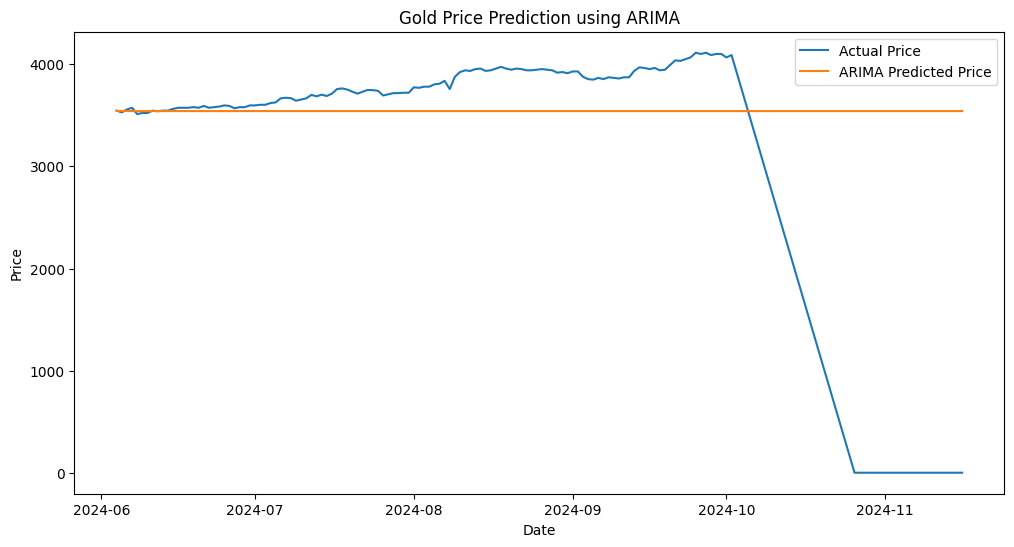

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/graduation project/Gold_Data/data.csv'
df = pd.read_csv(file_path)


# Check the actual column names in your DataFrame
print(df.columns)

# Prepare data
df = df[['Date', '24K - Local Price/Sell']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

prices = df['24K - Local Price/Sell']

# Split into train and test
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# --- ARIMA model ---
print("Training ARIMA model...")
arima_order = (5,1,0)  # Example order, adjust if needed
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Forecast test set
arima_forecast = arima_fit.forecast(steps=len(test))

# Calculate metrics for ARIMA
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_variance = np.var(test)
arima_norm_mae_mean = arima_mae / np.mean(test)
arima_norm_mae_range = arima_mae / (np.max(test) - np.min(test))

print(f"ARIMA MAE: {arima_mae:.4f}")
print(f"ARIMA RMSE: {arima_rmse:.4f}")
print(f"ARIMA Variance: {arima_variance:.4f}")
print(f"ARIMA Normalized MAE (mean): {arima_norm_mae_mean:.4f}")
print(f"ARIMA Normalized MAE (range): {arima_norm_mae_range:.4f}")

# Plot ARIMA results
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, arima_forecast, label='ARIMA Predicted Price')
plt.title('Gold Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### Forecasting with SARIMA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Date', '24K - Local Price/Sell', '24K - Local Price/Buy',
       '22K - Local Price/Sell', '22K - Local Price/Buy',
       '21K - Local Price/Sell', '21K - Local Price/Buy',
       '18K - Local Price/Sell', '18K - Local Price/Buy',
       '14K - Local Price/Sell', '14K - Local Price/Buy',
       '12K - Local Price/Sell', '12K - Local Price/Buy', '24K - Global Price',
       '22K - Global Price', '21K - Global Price', '18K - Global Price',
       '14K - Global Price', '12K - Global Price', '9K - Global Price',
       '15K - Global Price', '16K - Global Price', '17K - Global Price',
       '19K - Global Price', '20K - Global Price', '23K - Global Price',
       '25K - Global Price', '26K - Global Price', '27K - Global Price',
       '28K - Global Price', '29K - Global Price', '30K - Global Price',
       '31K - Global Price', '1K - Global Price', '2K - 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 642.0350
RMSE: 1558.4303
Variance of actual prices: 1830028.4190
Normalized MAE (by mean): 0.1989
Normalized MAE (by range): 0.1564


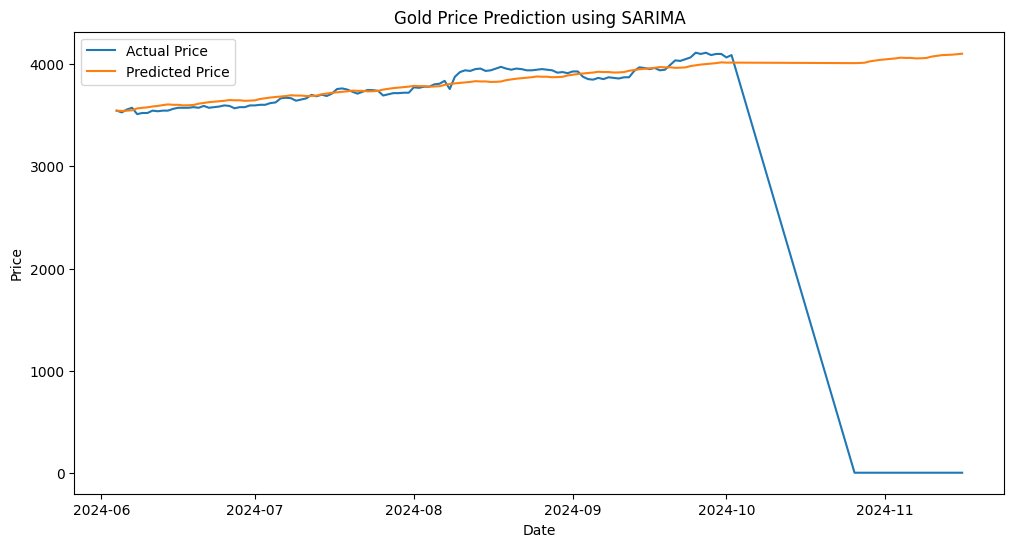

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/graduation project/Gold_Data/data.csv'
df = pd.read_csv(file_path)
# Check the actual column names in your DataFrame
print(df.columns)

# Use relevant columns
df = df[['Date', '24K - Local Price/Sell']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# No scaling needed for SARIMA
prices = df['24K - Local Price/Sell']

# Split data into train and test
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit SARIMA model
# (p,d,q) x (P,D,Q,s) parameters need to be chosen carefully.
# As an example, let's try (1,1,1)x(1,1,1,12) assuming monthly seasonality for illustration.
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

# Forecast on the test set length
forecast = model_fit.forecast(steps=len(test))

# Calculate errors
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
variance = np.var(test)

# Normalized MAE (by mean)
normalized_mae_mean = mae / np.mean(test)
# Normalized MAE (by range)
normalized_mae_range = mae / (np.max(test) - np.min(test))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Variance of actual prices: {variance:.4f}")
print(f"Normalized MAE (by mean): {normalized_mae_mean:.4f}")
print(f"Normalized MAE (by range): {normalized_mae_range:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, forecast, label='Predicted Price')
plt.title('Gold Price Prediction using SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### Forecasting with LSTM


> Add blockquote



In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/graduation project/Gold_Data/data.csv'
df = pd.read_csv(file_path)

# Check the actual column names in your DataFrame
print(df.columns)

# Assuming the column you want is named '24K - Local Price/Sell'
df = df[['Date', '24K - Local Price/Sell']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['24K - Local Price/Sell']])

# Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict on test set (scaled)
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual prices
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# Calculate errors
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate variance of actual values
variance = np.var(y_true)

# Normalized MAE (by mean)
normalized_mae_mean = mae / np.mean(y_true)

# Normalized MAE (by range)
normalized_mae_range = mae / (np.max(y_true) - np.min(y_true))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Variance of actual prices: {variance:.4f}")
print(f"Normalized MAE (by mean): {normalized_mae_mean:.4f}")
print(f"Normalized MAE (by range): {normalized_mae_range:.4f}")

# Function to predict gold price on a specified date
def predict_gold_price(date, df, model, scaler, seq_length=60):
    specified_date = pd.to_datetime(date)
    end_date = specified_date - pd.Timedelta(days=1)
    data_up_to_date = df.loc[:end_date]
    scaled_data = scaler.transform(data_up_to_date[['24K - Local Price/Sell']])
    input_sequence = scaled_data[-seq_length:].reshape(1, seq_length, 1)
    predicted_price = model.predict(input_sequence)
    predicted_price = scaler.inverse_transform(predicted_price)
    return predicted_price[0][0]

# Predict on a specified date
specified_date = '2024-01-01'
predicted_price = predict_gold_price(specified_date, df, model, scaler, seq_length)
print(f"Predicted gold price on {specified_date}: ${predicted_price:.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Date', '24K - Local Price/Sell', '24K - Local Price/Buy',
       '22K - Local Price/Sell', '22K - Local Price/Buy',
       '21K - Local Price/Sell', '21K - Local Price/Buy',
       '18K - Local Price/Sell', '18K - Local Price/Buy',
       '14K - Local Price/Sell', '14K - Local Price/Buy',
       '12K - Local Price/Sell', '12K - Local Price/Buy', '24K - Global Price',
       '22K - Global Price', '21K - Global Price', '18K - Global Price',
       '14K - Global Price', '12K - Global Price', '9K - Global Price',
       '15K - Global Price', '16K - Global Price', '17K - Global Price',
       '19K - Global Price', '20K - Global Price', '23K - Global Price',
       '25K - Global Price', '26K - Global Price', '27K - Global Price',
       '28K - Global Price', '29K - Global Price', '30K - Global Price',
       '31K - Global Price', '1K - Global Price', '2K - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.1713
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0126
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0031
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0025
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0015
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0014
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0010    
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9.3410e-04
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 9.1426e-04
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0012
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0010
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 9.6214e-04
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 9.4361e-04
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9.6103e-04
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss

### Forecasting with Prophet


In [6]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error



prices = df['24K - Local Price/Sell']
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Prepare data for Prophet (requires columns 'ds' and 'y')
prophet_df = prices.reset_index().rename(columns={'Date': 'ds', '24K - Local Price/Sell': 'y'})
prophet_train = prophet_df.iloc[:train_size]
prophet_test = prophet_df.iloc[train_size:]

# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(prophet_train)

# Create a dataframe to hold predictions for the test period
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Extract the predicted values corresponding to the test period
prophet_forecast = forecast['yhat'].iloc[-len(test):].values

# Calculate metrics
mae = mean_absolute_error(test.values, prophet_forecast)
rmse = np.sqrt(mean_squared_error(test.values, prophet_forecast))
variance = np.var(test.values)
normalized_mae_mean = mae / np.mean(test.values)
normalized_mae_range = mae / (np.max(test.values) - np.min(test.values))

print("Prophet Model Metrics:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Normalized MAE (mean): {normalized_mae_mean:.4f}")
print(f"Normalized MAE (range): {normalized_mae_range:.4f}")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp30fbuu0j/vou63k3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp30fbuu0j/qcmsy9me.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8363', 'data', 'file=/tmp/tmp30fbuu0j/vou63k3g.json', 'init=/tmp/tmp30fbuu0j/qcmsy9me.json', 'output', 'file=/tmp/tmp30fbuu0j/prophet_modelmu8dzauh/prophet_model-20250526215522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model Metrics:
MAE: 917.7130
RMSE: 1287.4103
Variance: 1830028.4190
Normalized MAE (mean): 0.2843
Normalized MAE (range): 0.2236


### Forecasting with XGBOOST


In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Assume you have your DataFrame 'df' with Date as index and '24K - Local Price/Sell' column
# Example:
# df = pd.read_csv('data.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# prices = df['24K - Local Price/Sell']

prices = df['24K - Local Price/Sell']

# Function to create lag features for time series data
def create_lag_features(series, lags=5):
    df_lags = pd.DataFrame()
    for lag in range(1, lags + 1):
        df_lags[f'lag_{lag}'] = series.shift(lag)
    return df_lags

lags = 5
df_lagged = create_lag_features(prices, lags)
df_lagged['target'] = prices.values
df_lagged.dropna(inplace=True)

# Split features and target
X = df_lagged.drop('target', axis=1)
y = df_lagged['target']

# Train/test split preserving order (no shuffling)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
variance = np.var(y_test)
normalized_mae_mean = mae / np.mean(y_test)
normalized_mae_range = mae / (np.max(y_test) - np.min(y_test))

print("XGBoost Model Metrics:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Normalized MAE (mean): {normalized_mae_mean:.4f}")
print(f"Normalized MAE (range): {normalized_mae_range:.4f}")


XGBoost Model Metrics:
MAE: 290.4718
RMSE: 650.9343
Variance: 1842300.9093
Normalized MAE (mean): 0.0900
Normalized MAE (range): 0.0708


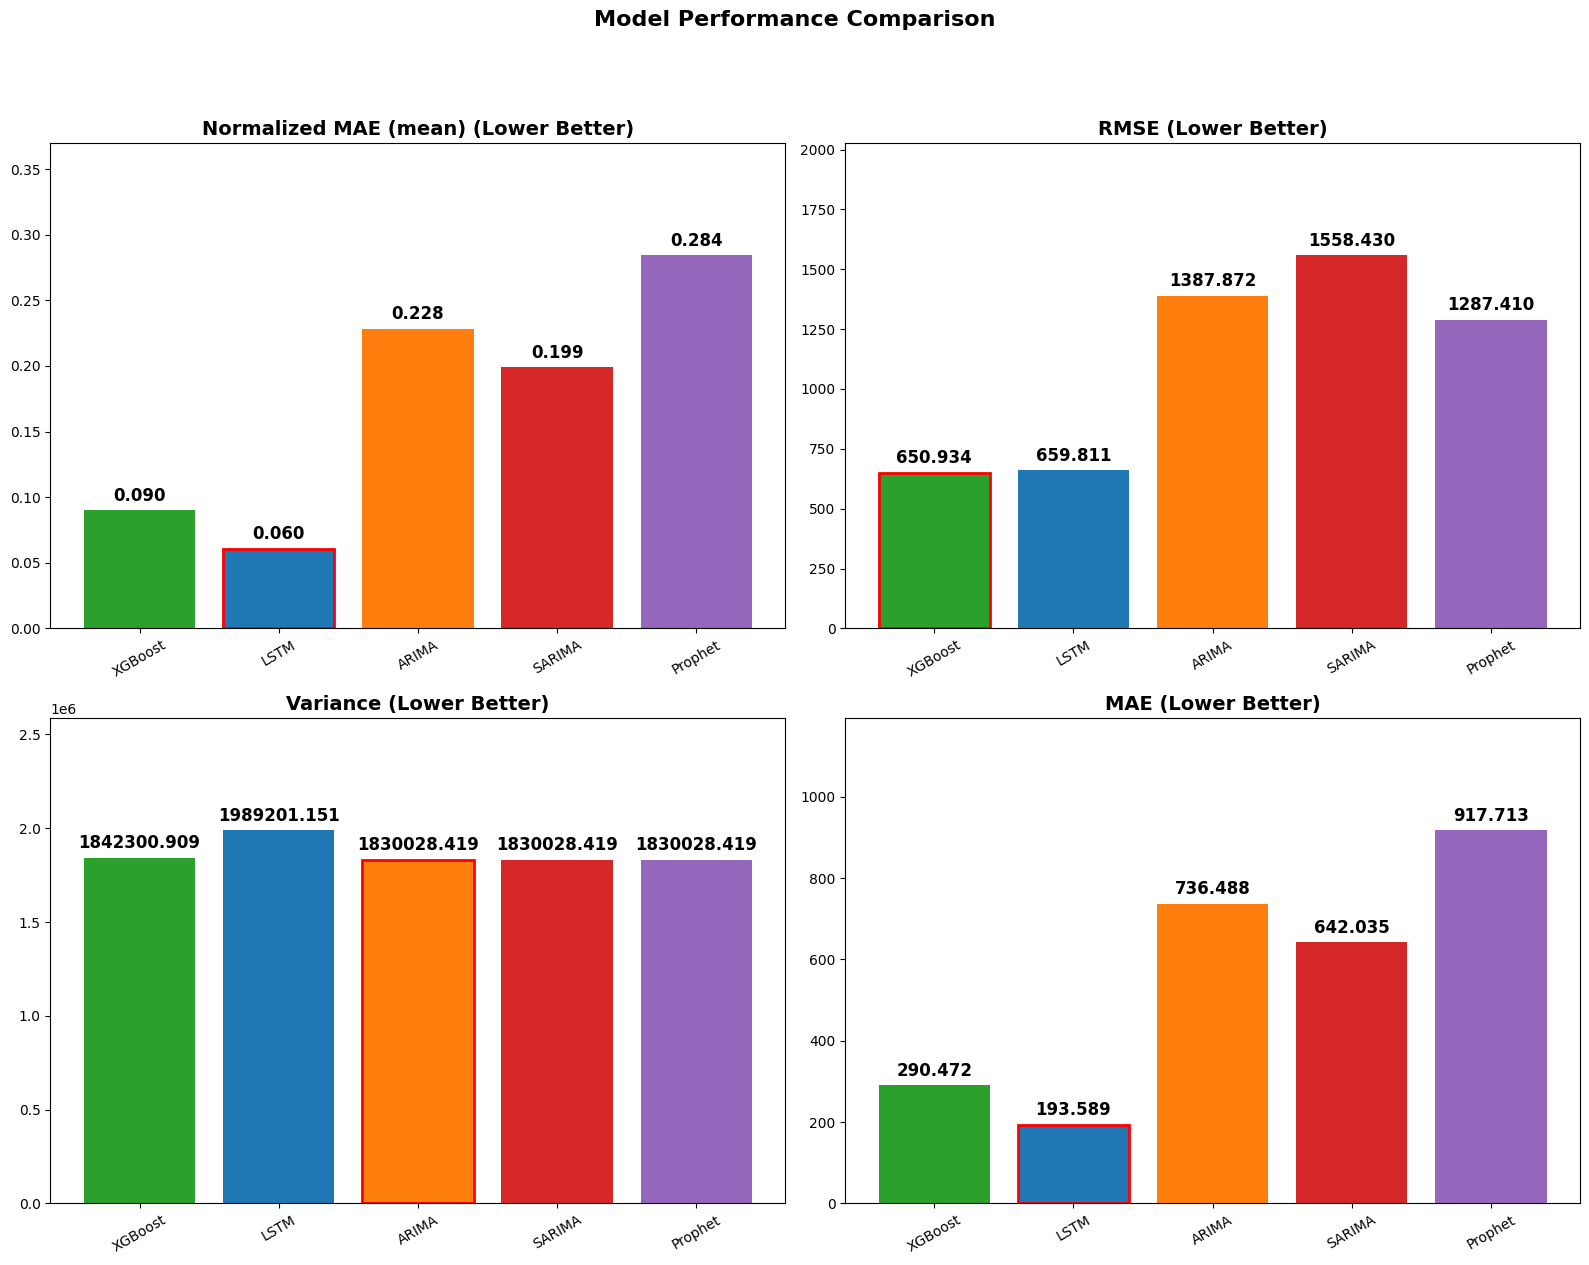

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def compare_results(metrics_dict, save_path=None):
    model_order = ['XGBoost', 'LSTM', 'ARIMA', 'SARIMA', 'Prophet']
    metrics = ['Normalized MAE (mean)', 'RMSE', 'Variance', 'MAE']

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.05)

    colors = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd']
    highlight_color = '#ff0000'

    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]
        values = [metrics_dict[m][metric] for m in model_order]

        y_max = max(values) * 1.3
        bars = ax.bar(model_order, values, color=colors)
        ax.set_ylim(0, y_max)

        for bar, val in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * y_max,
                    f'{val:.3f}', ha='center', fontsize=12, fontweight='bold')

        # Fix: Determine better direction properly
        ax.set_title(f'{metric} ({"Lower" if any(k in metric for k in ["MAE", "RMSE", "Variance"]) else "Higher"} Better)',
                     fontsize=14, fontweight='bold')

        ax.tick_params(axis='x', rotation=30)

        # Fix: Highlight bar — min for MAE, RMSE, Variance; max for others
        if metric in ["MAE", "RMSE", "Variance", "Normalized MAE (mean)"]:
            best_idx = np.argmin(values)
        else:
            best_idx = np.argmax(values)

        bars[best_idx].set_edgecolor(highlight_color)
        bars[best_idx].set_linewidth(2)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()

# Data dictionary
all_metrics = {
    'XGBoost': {
        'MAE': 290.4718,
        'RMSE': 650.9343,
        'Variance': 1842300.9093,
        'Normalized MAE (mean)': 0.0900
    },
    'Prophet': {
        'MAE': 917.7130,
        'RMSE': 1287.4103,
        'Variance': 1830028.4190,
        'Normalized MAE (mean)': 0.2843
    },
    'LSTM': {
        'MAE': 193.5889,
        'RMSE': 659.8105,
        'Variance': 1989201.1508,
        'Normalized MAE (mean)': 0.0605
    },
    'ARIMA': {
        'MAE': 736.4880,
        'RMSE': 1387.8725,
        'Variance': 1830028.4190,
        'Normalized MAE (mean)': 0.2281
    },
    'SARIMA': {
        'MAE': 642.0350,
        'RMSE': 1558.4303,
        'Variance': 1830028.4190,
        'Normalized MAE (mean)': 0.1989
    }
}

# Plot
compare_results(all_metrics, save_path='model_comparison.png')


In [13]:
# Calculate daily returns
returns = prices.pct_change().dropna()

# Calculate volatility (std dev of returns)
volatility = returns.std()

print(f"Daily volatility (std dev of returns): {volatility:.6f}")

# Optional: Annualize volatility if your data is daily
trading_days = 252
annual_volatility = volatility * np.sqrt(trading_days)
print(f"Annualized volatility: {annual_volatility:.6f}")


Daily volatility (std dev of returns): 0.040926
Annualized volatility: 0.649674
